In [1]:
outcome <- read.csv("outcome-of-care-measures.csv", colClasses = "character")

In [2]:
 head(outcome)

Provider.Number,Hospital.Name,Address.1,Address.2,Address.3,City,State,ZIP.Code,County.Name,Phone.Number,⋯,Lower.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Upper.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Number.of.Patients...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Footnote...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Hospital.30.Day.Readmission.Rates.from.Pneumonia,Comparison.to.U.S..Rate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Lower.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Upper.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Number.of.Patients...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Footnote...Hospital.30.Day.Readmission.Rates.from.Pneumonia
010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,,,DOTHAN,AL,36301,HOUSTON,3347938701,⋯,21.3,26.5,891,,17.1,No Different than U.S. National Rate,14.4,20.4,400,
010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,,,BOAZ,AL,35957,MARSHALL,2565938310,⋯,19.2,26.1,264,,17.6,No Different than U.S. National Rate,15.0,20.6,374,
010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,,,FLORENCE,AL,35631,LAUDERDALE,2567688400,⋯,17.2,22.9,614,,16.9,No Different than U.S. National Rate,14.7,19.5,842,
010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,,,OPP,AL,36467,COVINGTON,3344933541,⋯,22.4,31.9,135,,19.4,No Different than U.S. National Rate,15.9,23.2,254,
010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,,,LUVERNE,AL,36049,CRENSHAW,3343353374,⋯,19.9,30.2,59,,18.0,No Different than U.S. National Rate,14.0,22.8,56,
010010,MARSHALL MEDICAL CENTER NORTH,8000 ALABAMA HIGHWAY 69,,,GUNTERSVILLE,AL,35976,MARSHALL,2565718000,⋯,20.1,28.2,173,,18.7,No Different than U.S. National Rate,15.7,22.2,326,


In [3]:
 outcome[, 11] <- as.numeric(outcome[, 11])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

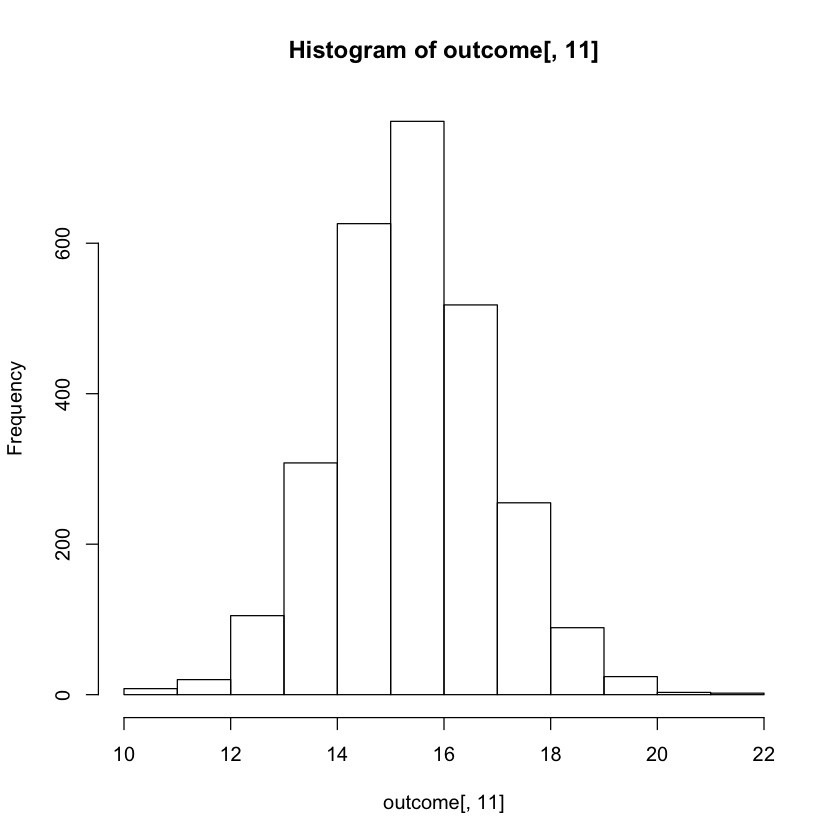

In [4]:
hist(outcome[, 11])

In [23]:
best <- function(state, outcome) {
        check_valid <- c("heart attack","heart failure","pneumonia")
        # Check if the outcome is a valid one
        if(outcome %in% check_valid)
        {
                file <- read.csv(file="outcome-of-care-measures.csv",colClasses = "character")
                subset <- file[c(2, 7, 11, 17, 23)]
                # 2 Hospital Name
                # 7 State abv.
                # 11 Heart Attack
                # 17 Heart Failure
                # 23 Pneumonia
                names(subset) <- c("name","state","heart attack","heart failure","pneumonia")
                
                #Check if valid state
                if (state %in% subset[,"state"]) 
                {       # get where the valid rows with the information about the given state       
                        validData <- subset[,"state"] == state   &   subset[,outcome] != "Not Available"              
                        minPos <- which.min(subset[,outcome][validData])   # give the position of the lower outcome rate
                        name <- subset[,"name"][validData][minPos]         # get hospital name
                } else stop("invalid state")       
        }
        else stop("invalid outcome")
        name
}

In [24]:
best("TX", "heart attack")

[1] "CYPRESS FAIRBANKS MEDICAL CENTER"

In [25]:
 best("MD", "heart attack")

[1] "JOHNS HOPKINS HOSPITAL, THE"

In [39]:
rankhospital("MD", "heart failure", 5)

[1] "SAINT AGNES HOSPITAL"

In [38]:
rankhospital("MD", "heart attack", "worst")

[1] "HARFORD MEMORIAL HOSPITAL"

In [40]:
rankall <- function(outcome, num = "best"){
        
        ## Read outcome data
        ## Check that state and outcome are valid
        ## For each state, find the hospital of the given rank
        ## Return a data frame with the hospital names and the
        ## (abbreviated) state name
        
        
        valid_outcomes <- c("heart attack","heart failure","pneumonia")
        
        
        # Check if the outcome is a valid one
        if(outcome %in% valid_outcomes)
        {
                file              <- read.csv(file="outcome-of-care-measures.csv",colClasses = "character")
                filterData        <- file[c(2, 7, 11, 17, 23)]
                names(filterData) <- c("name","state","heart attack","heart failure","pneumonia")
                dFrameFilter      <- filterData[filterData[outcome] != "Not Available", ] # get where the valid rows with the information 
                
                #getting correct order first by rate. In case of ties the name is use.
                index        <- order(dFrameFilter$name)                   # order by name
                dFrameFilter <- dFrameFilter[index,]
                index        <- order(as.numeric(dFrameFilter[,outcome])) # order by outcome
                orderData    <- dFrameFilter[index,]                      # The dataFrame ordered by outcome and name
                allStates    <- unique(dFrameFilter[,"state"])            # a vector with all unique states
                allStates    <- allStates[order(allStates)]               # order the vector of unique states
                
                output <- data.frame()
                for(state in allStates) # For all state in the unique list of states
                {
                        getStateData <- orderData[orderData$state == state, c(1,2)] #get State data (name,state)
                        if(is.numeric(num) & nrow(getStateData) <= num) 
                        {
                                name <- NA
                        }
                        else
                        {       
                                if(is.numeric(num))      name   <- getStateData[,"name"][num]
                                else if(num == "best")   name   <- getStateData[,"name"][1]
                                else                     name   <- tail(getStateData, n=1)[,"name"] #worst
                        }
                        newRow <- data.frame(name,state)       #create row to be added
                        names(newRow) <- names(output)
                        output <- rbind(output,newRow)
                } # for(state in allStates)
                        
                names(output) <- c("hospital","state")
                output
        }
        else stop("invalid outcome")   
}

In [41]:
best("SC", "heart attack")

[1] "MUSC MEDICAL CENTER"

In [42]:
best("NY", "pneumonia")

[1] "MAIMONIDES MEDICAL CENTER"

In [43]:
best("AK", "pneumonia")

[1] "YUKON KUSKOKWIM DELTA REG HOSPITAL"

In [44]:
rankhospital("NC", "heart attack", "worst")

[1] "WAYNE MEMORIAL HOSPITAL"

In [45]:
rankhospital("WA", "heart attack", 7)

[1] "YAKIMA VALLEY MEMORIAL HOSPITAL"

In [46]:
rankhospital("TX", "pneumonia", 10)

[1] "SETON SMITHVILLE REGIONAL HOSPITAL"

In [47]:
rankhospital("NY", "heart attack", 7)

[1] "BELLEVUE HOSPITAL CENTER"

In [48]:
r <- rankall("heart attack", 4)
as.character(subset(r, state == "HI")$hospital)

[1] "CASTLE MEDICAL CENTER"

In [49]:
r <- rankall("pneumonia", "worst")
as.character(subset(r, state == "NJ")$hospital)

[1] "BERGEN REGIONAL MEDICAL CENTER"

In [50]:
r <- rankall("heart failure", 10)
as.character(subset(r, state == "NV")$hospital)

[1] "RENOWN SOUTH MEADOWS MEDICAL CENTER"